<a href="https://colab.research.google.com/github/harkrish/sentiment-analysis/blob/master/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd 
'''import numpy as np

tsv_file="https://raw.githubusercontent.com/harkrish/sentiment-analysis/master/amazon_alexa.tsv"
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('new_name.csv',index=False)
data=pd.read_csv("new_name.csv")''' 
data=pd.read_csv("https://raw.githubusercontent.com/harkrish/sentiment-analysis/master/amazon_alexa.tsv",sep='\t') 
data.head(5)


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [96]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [97]:
data.groupby('rating').describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [98]:
data['length'] = data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

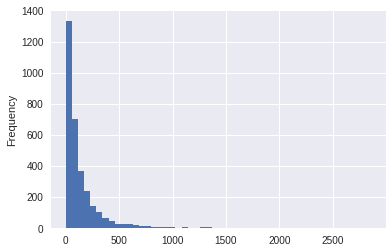

In [100]:
data['length'].plot(bins=50, kind='hist')

In [101]:
data.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [102]:
data[data['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a2db3a978>,
      dtype=object)

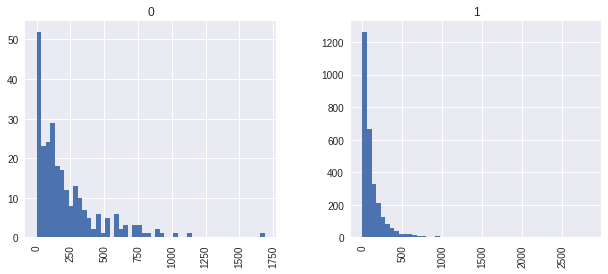

In [103]:
data.hist(column='length', by='feedback', bins=50,figsize=(10,4))

In [0]:
# Importing the dataset
data = pd.read_csv('https://raw.githubusercontent.com/harkrish/sentiment-analysis/master/amazon_alexa.tsv', delimiter ='\t', quoting = 3)

In [105]:
#cleaning the text
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i] )
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
# creating the Bag of words Model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,4].values


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [0]:
import xgboost as xgb

In [109]:
#Here I am using XGBoost algorithm to optimize the result


# Fitting Random Forest classifier with 100 trees to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)   #Runall

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [111]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 12  42]
 [  0 576]]


In [0]:
 '''Result with Accuracy of 93.33% (TP+TN)/total = (576+12)/630 = 0.9333

True Positive Rate: When it's actually yes, how often does it predict yes? TP/actual yes = 576/576 = 1.00 also known as "Sensitivity" or "Recall" it is 100%

False Positive Rate: When it's actually no, how often does it predict yes? FP/actual no = 42/54 = .77 or 77.77%

Precision: When it predicts yes, how often is it correct? TP/predicted yes = 576/618 = 0.9320 or 93.20%''' 
 
F-score is the Harmonic mean of Accuracy and recall 
  F=2*(Accuracy*Recall)/(Accuracy+Recall) 
  F=96.58
  